###**Section 2 – Supervised learning – classification**


In [ ]:
 from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
#loading data by using pickle
import pickle

with open('/content/drive/My Drive/shared_data.pkl', 'rb') as file:
  data = pickle.load(file)

data.head()


,session_id,full_session,first_timestamp,Set_Fingerprint,date_column,num_characters,Word_Count,num_intents,tf_idf
0,0,enable ; system ; shell ; sh ; cat /proc/mount...,1559641511,"[Defense Evasion, Discovery]",2019-06-04,280,62,2,"[0.0, 0.0, 0.0, 0.0, 0.12857118194428388, 0.0,..."
1,1,enable ; system ; shell ; sh ; cat /proc/mount...,1559641550,"[Defense Evasion, Discovery]",2019-06-04,280,62,2,"[0.0, 0.0, 0.0, 0.0, 0.12857118194428388, 0.0,..."
2,2,enable ; system ; shell ; sh ; cat /proc/mount...,1559642081,"[Defense Evasion, Discovery]",2019-06-04,280,62,2,"[0.0, 0.0, 0.0, 0.0, 0.12857118194428388, 0.0,..."
3,3,enable ; system ; shell ; sh ; cat /proc/mount...,1559643734,"[Defense Evasion, Discovery]",2019-06-04,280,62,2,"[0.0, 0.0, 0.0, 0.0, 0.12857118194428388, 0.0,..."
4,4,enable ; system ; shell ; sh ; cat /proc/mount...,1559644639,"[Defense Evasion, Discovery]",2019-06-04,280,62,2,"[0.0, 0.0, 0.0, 0.0, 0.12857118194428388, 0.0,..."


In [ ]:
#All the necessary libraries
!pip install scikit-multilearn
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import re
import os
from sklearn.feature_extraction.text import TfidfVectorizer
from scipy.sparse import hstack
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MultiLabelBinarizer
from sklearn.feature_extraction.text import TfidfVectorizer
from scipy.sparse import hstack
from sklearn.model_selection import train_test_split
from skmultilearn.model_selection import iterative_train_test_split
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, hamming_loss, classification_report
from skmultilearn.problem_transform import BinaryRelevance
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import hamming_loss, precision_score, recall_score, f1_score
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import multilabel_confusion_matrix, ConfusionMatrixDisplay
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 89.4/89.4 kB 2.1 MB/s eta 0:00:00


### **1.Perform a split to segment the dataset into training and test dataset. If you want to standardize your dataset, fit the scaler on training set and transforming both training and test. Notice that the sklearn implementation of tf-idf already performs the standardization.**

In [ ]:
#We need to split our data in 3 segments, training set, validation set, and test set
X_features = data[['first_timestamp', 'tf_idf']]

# Apply pd.Series to each element of the list column to expand it into separate columns
X_features_flattened = X_features['tf_idf'].apply(pd.Series)

# Concatenate the flattened DataFrame with the original DataFrame
X_features = pd.concat([X_features.drop(columns=['tf_idf']), X_features_flattened], axis=1)

In [ ]:
y = data['Set_Fingerprint']
X_features_array = X_features.to_numpy()


#conversion of the list of labels in each row to a multi-label format
mlb = MultiLabelBinarizer()
y_binarized = mlb.fit_transform(y)

label_names = mlb.classes_

X_train, y_train, X_test, y_test = iterative_train_test_split(X_features_array, y_binarized, test_size=0.2)

In [ ]:
#Standardization of training and test set
scaler = StandardScaler()

X_train = scaler.fit_transform(X_train)

X_test = scaler.transform(X_test)

### **2.Choose at least 2 ML methods, and perform the model training, with default parameter configuration, evaluating the performance on both training and test set. Output the confusion matrix and classification report. Do you observe overfitting or under-fitting? Which model generates the best performance?Do you observe overfitting or under-fitting? Which model generates the best performance?**

**we choose two model training**

**1.   Decision Tree Classifier**

**2.   Random Forest Classifier**



### **Decision Tree Classifier**

In [ ]:
# classifier initialization
clf_DecisionTree = BinaryRelevance(DecisionTreeClassifier())

#train
clf_DecisionTree.fit(X_train, y_train)

y_test_pred = clf_DecisionTree.predict(X_test)
y_train_pred = clf_DecisionTree.predict(X_train)

# Evaluation
train_accuracy = accuracy_score(y_train, y_train_pred)
test_accuracy = accuracy_score(y_test, y_test_pred)

print("Training accuracy:", train_accuracy)
print("Test accuracy:", test_accuracy)

Training accuracy: 0.9995494166554915
Test accuracy: 0.9701780733748123


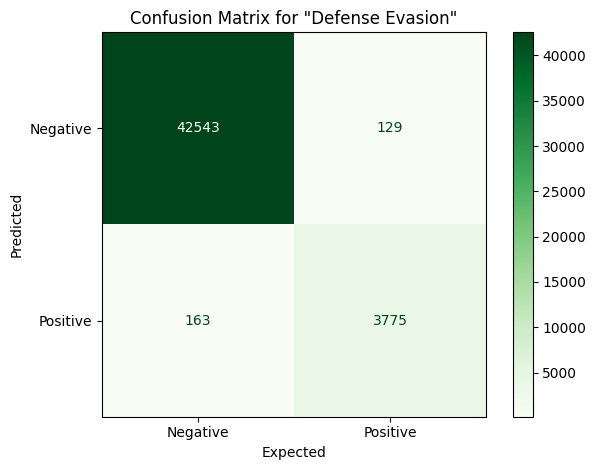

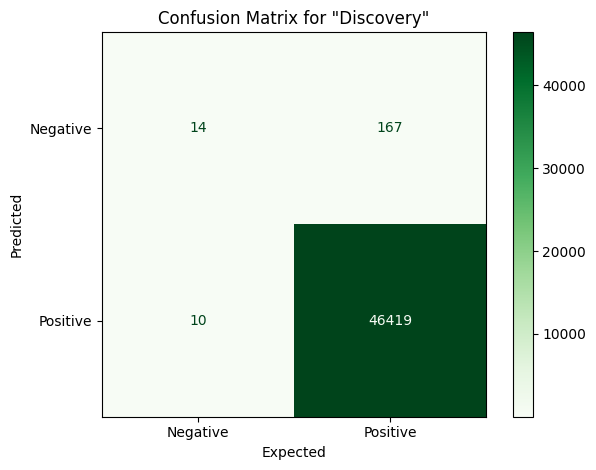

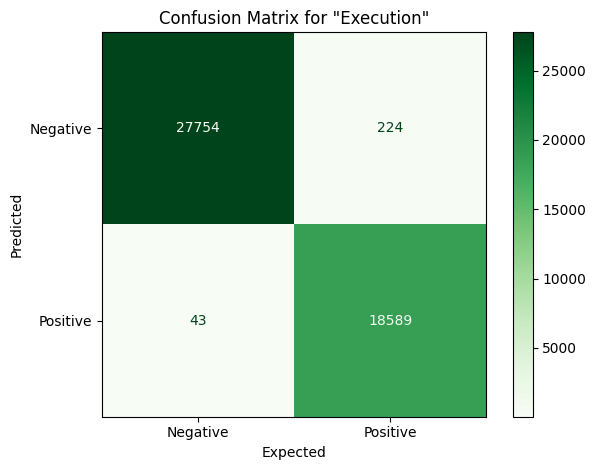

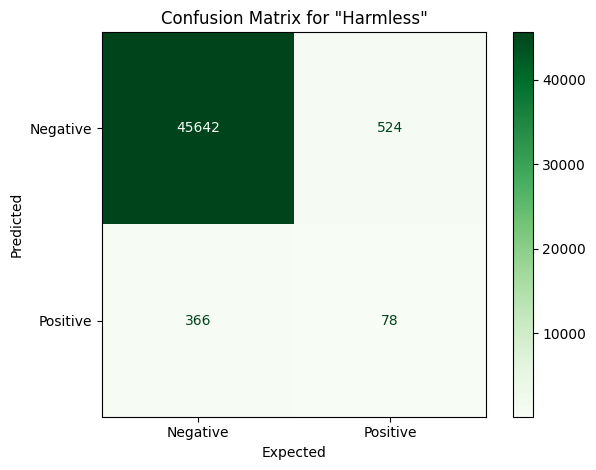

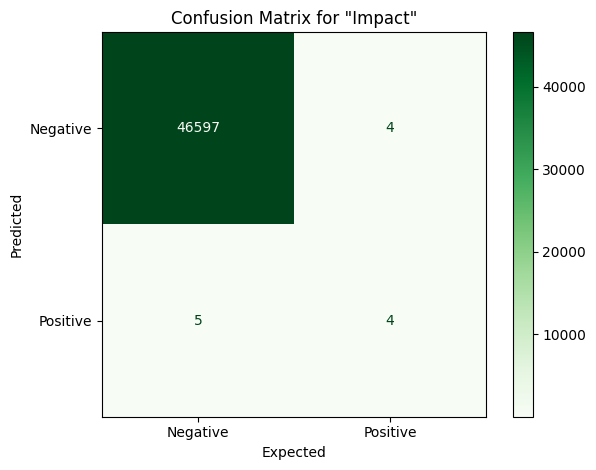

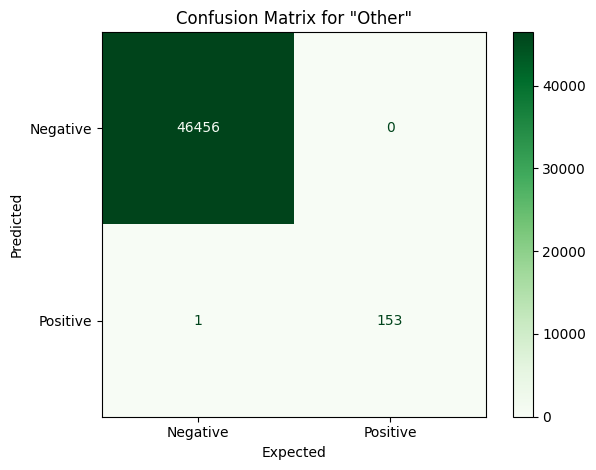

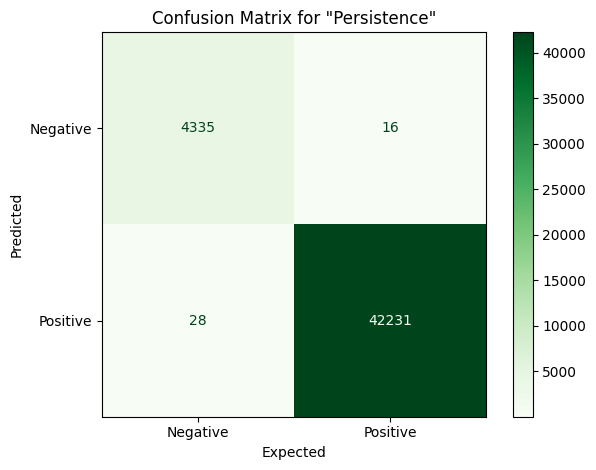

In [ ]:
#confusion matrix-Decision Tree Classifier
mcm = multilabel_confusion_matrix(y_test, y_test_pred)

label_names_list = label_names.tolist()

for i in range(len(label_names_list)):
    cm = mcm[i]
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['Negative', 'Positive'])
    fig, ax = plt.subplots()
    disp.plot(ax=ax, cmap='Greens')
    ax.set_title(f'Confusion Matrix for "{label_names_list[i]}"')
    ax.set_xlabel('Expected')
    ax.set_ylabel('Predicted')
    plt.tight_layout()
    plot_filename = os.path.join('/content/drive/My Drive/ML_project', f"confusion_matrix_{label_names_list[i]}.png")
    plt.savefig(plot_filename)
    plt.show()

In [ ]:
#Hamming Loss, Precision Score, Recall score, and F1 score-Decision Tree Classifier
hl = hamming_loss(y_test, y_test_pred)
precision = precision_score(y_test, y_test_pred, average='weighted')
recall = recall_score(y_test, y_test_pred, average='weighted')
f1 = f1_score(y_test, y_test_pred, average='weighted')

print("Hamming Loss:", hl)
print("Precision:", precision)
print("Recall:", recall)
print("F1-score:", f1)


Hamming Loss: 0.005149109633125939
Precision: 0.9917276909262749
Recall: 0.9944933625351987
F1-score: 0.9930908702314626


In [ ]:
#classification report-Decision Tree Classifier
print("Classification Report:")
print(classification_report(y_test, y_test_pred, target_names=label_names_list, zero_division=0))

Classification Report:
                 precision    recall  f1-score   support

Defense Evasion       0.97      0.96      0.96      3938
      Discovery       1.00      1.00      1.00     46429
      Execution       0.99      1.00      0.99     18632
       Harmless       0.13      0.18      0.15       444
         Impact       0.50      0.44      0.47         9
          Other       1.00      0.99      1.00       154
    Persistence       1.00      1.00      1.00     42259

      micro avg       0.99      0.99      0.99    111865
      macro avg       0.80      0.80      0.80    111865
   weighted avg       0.99      0.99      0.99    111865
    samples avg       0.99      0.99      0.99    111865



### **3.Tune the hyper-parameters of the models through cross-validation. How do performance vary?**

In [ ]:
#Hyper-Parameters Tuning-Decision Tree classifier
def custom_multilabel_accuracy_score(estimator, X, y):
    # Predict labels using the estimator
    y_pred = estimator.predict(X)

    # Convert sparse matrices to dense arrays
    if hasattr(y, 'toarray'):
        y = y.toarray()
    if hasattr(y_pred, 'toarray'):
        y_pred = y_pred.toarray()

    # Calculate accuracy for each label and average them
    label_accuracies = [accuracy_score(y[:, i], y_pred[:, i]) for i in range(y.shape[1])]
    return np.mean(label_accuracies)


# Define the base classifier
base_classifier = DecisionTreeClassifier()

# Define the Binary Relevance model
clf_DecisionTree = BinaryRelevance(classifier=base_classifier)



# Define the hyperparameter grid to search
param_grid = {
    'classifier__criterion': ['gini'],
    'classifier__max_depth': [None, 10],
    'classifier__min_samples_split': [2, 5],
    'classifier__min_samples_leaf': [1, 2]
}

# Perform Grid Search with cross-validation
grid_search = GridSearchCV(estimator=clf_DecisionTree, param_grid=param_grid, cv=5, scoring=custom_multilabel_accuracy_score)
grid_search.fit(X_train, y_train)

# Print the best hyperparameters found
print("Best Hyperparameters:", grid_search.best_params_)

# Print the best cross-validated accuracy score
print("Best Cross-validated Accuracy:", grid_search.best_score_)


Best Hyperparameters: {'classifier__criterion': 'gini', 'classifier__max_depth': None, 'classifier__min_samples_leaf': 2, 'classifier__min_samples_split': 5}
Best Cross-validated Accuracy: 0.9967723519607654


### **Random Forest Classifier**

In [ ]:
#Model training
clf_RandomForest = RandomForestClassifier()
clf_RandomForest.fit(X_train, y_train)


#Predictions
y_train_pred = clf_RandomForest.predict(X_train)
y_test_pred = clf_RandomForest.predict(X_test)

# Model evaluation
training_accuracy = accuracy_score(y_train, y_train_pred)
testing_accuracy = accuracy_score(y_test, y_test_pred)

print("Training Accuracy:", training_accuracy)
print("Testing Accuracy:", testing_accuracy)

Training Accuracy: 0.9995547807429261
Testing Accuracy: 0.9703926196095258


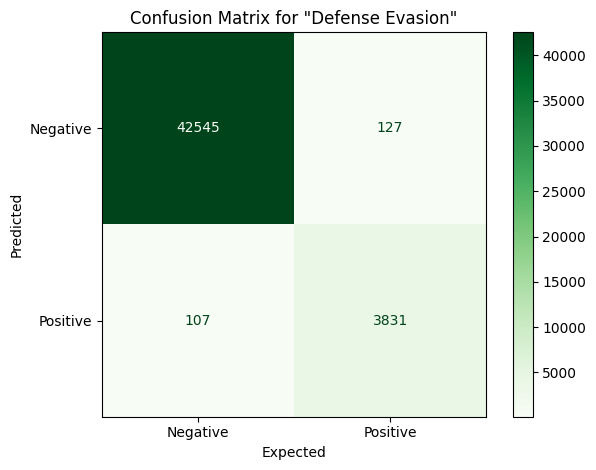

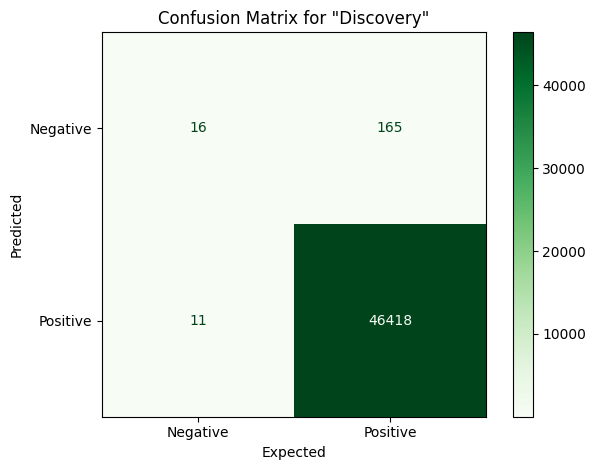

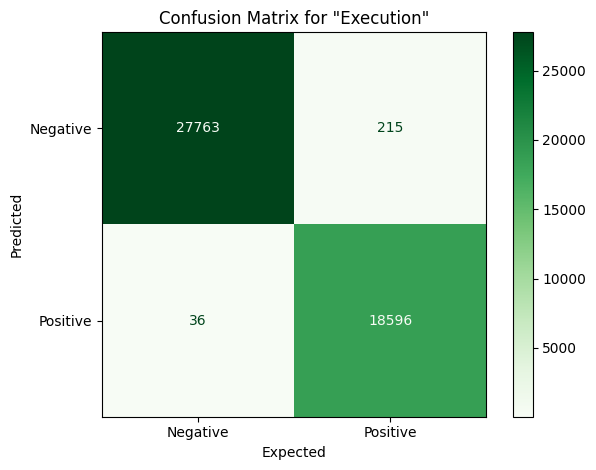

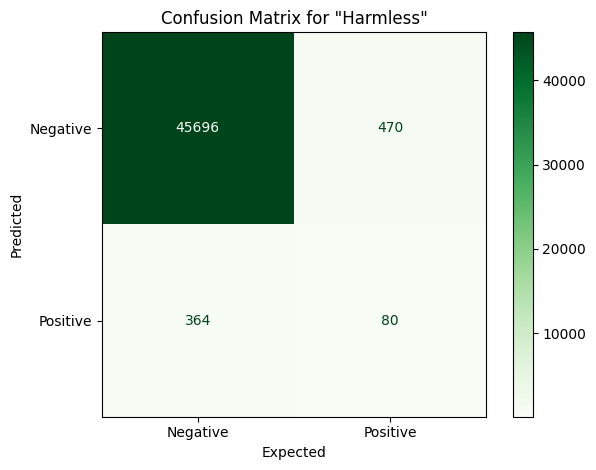

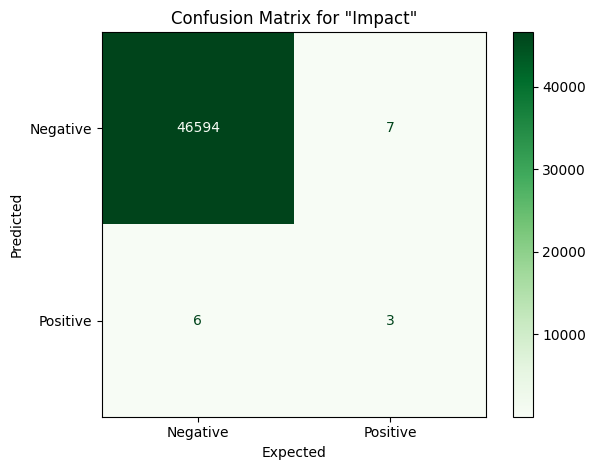

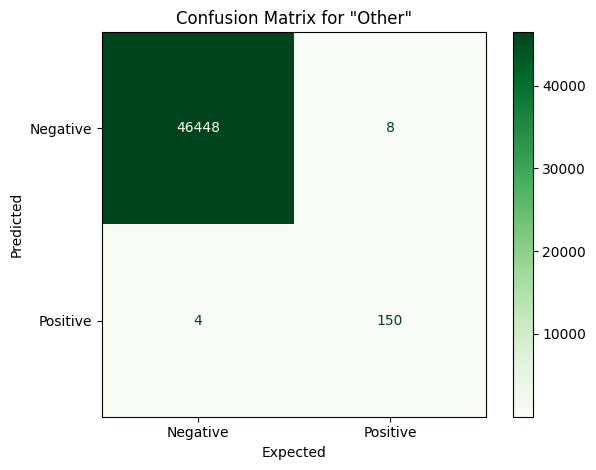

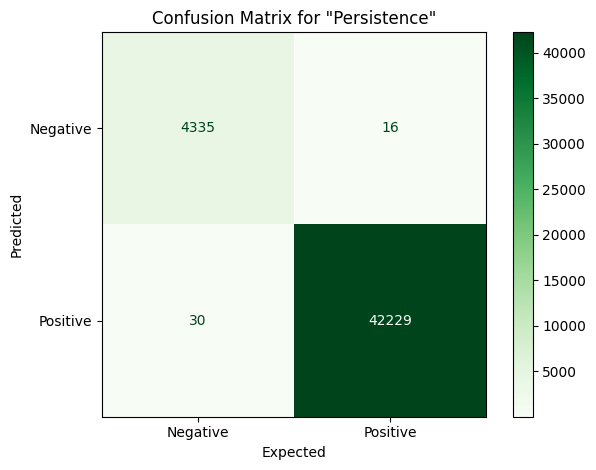

In [ ]:
#confusion matrix-Random Forest Classifier
mcm = multilabel_confusion_matrix(y_test, y_test_pred)

label_names_list = label_names.tolist()

for i in range(len(label_names_list)):
    cm = mcm[i]
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['Negative', 'Positive'])
    fig, ax = plt.subplots()
    disp.plot(ax=ax, cmap='Greens')
    ax.set_title(f'Confusion Matrix for "{label_names_list[i]}"')
    ax.set_xlabel('Expected')
    ax.set_ylabel('Predicted')
    plt.tight_layout()
    plot_filename = os.path.join('/content/drive/My Drive/ML_project', f"confusion_matrix_{label_names_list[i]}.png")
    plt.savefig(plot_filename)
    plt.show()

In [ ]:
#Hamming Loss, Precision Score, Recall score, and F1 score-Random Forest Classifier

hl = hamming_loss(y_test, y_test_pred)
precision = precision_score(y_test, y_test_pred, average='weighted', zero_division=0)
recall = recall_score(y_test, y_test_pred, average='weighted')
f1 = f1_score(y_test, y_test_pred, average='weighted')

print("Hamming Loss:", hl)
print("Precision:", precision)
print("Recall:", recall)
print("F1-score:", f1)


Hamming Loss: 0.004799705765163822
Precision: 0.9918358033437857
Recall: 0.9950118446341573
F1-score: 0.9934110405420897


In [ ]:
# Generate classification report-Random Forest Classifier
print("Classification Report:")
print(classification_report(y_test, y_test_pred, target_names= label_names_list, zero_division=0))

Classification Report:
                 precision    recall  f1-score   support

Defense Evasion       0.97      0.97      0.97      3938
      Discovery       1.00      1.00      1.00     46429
      Execution       0.99      1.00      0.99     18632
       Harmless       0.15      0.18      0.16       444
         Impact       0.30      0.33      0.32         9
          Other       0.95      0.97      0.96       154
    Persistence       1.00      1.00      1.00     42259

      micro avg       0.99      1.00      0.99    111865
      macro avg       0.76      0.78      0.77    111865
   weighted avg       0.99      1.00      0.99    111865
    samples avg       0.99      1.00      0.99    111865



### **3.Tune the hyper-parameters of the models through cross-validation. How do performance vary?**

In [ ]:
#Hyper-Parameters Tuning-Random forest classifier
def custom_multilabel_accuracy_score(estimator, X, y):
    y_pred = estimator.predict(X)

    if hasattr(y, 'toarray'):
        y = y.toarray()
    if hasattr(y_pred, 'toarray'):
        y_pred = y_pred.toarray()

    label_accuracies = [accuracy_score(y[:, i], y_pred[:, i]) for i in range(y.shape[1])]
    return np.mean(label_accuracies)


base_classifier = RandomForestClassifier()

#Binary Relevance model
clf_RandomForest = BinaryRelevance(classifier=base_classifier)

#hyperparameter grid to search
param_dist = {
    'classifier__n_estimators': randint(10, 50),
    'classifier__criterion': ['gini'],
    'classifier__max_depth': [None, 10],
    'classifier__min_samples_split': randint(2, 5),
    'classifier__min_samples_leaf': randint(1, 2)
}

#Randomized Search with cross-validation
random_search = RandomizedSearchCV(estimator=clf_RandomForest, param_distributions=param_dist, n_iter=10, cv=3, scoring=custom_multilabel_accuracy_score, n_jobs=-1)
random_search.fit(X_train, y_train)


print("Best Hyperparameters:", random_search.best_params_)
print("Best Cross-validated Accuracy:", random_search.best_score_)


Best Hyperparameters: {'classifier__criterion': 'gini', 'classifier__max_depth': None, 'classifier__min_samples_leaf': 1, 'classifier__min_samples_split': 4, 'classifier__n_estimators': 32}
Best Cross-validated Accuracy: 0.9946910681962007
